In [1]:
# pip install opencv-python scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 MB 2.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 3.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 3.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.7/225.7 kB 3.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 3.8 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 4.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 2.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: scipy
    Found existing install

In [1]:
import cv2
import numpy as np
from skimage.color import rgb2hsv
import matplotlib.pyplot as plt
import os

In [2]:
# create images array
path = './img'
folder = os.fsencode(path)

filenames = []
imageList=[]

for file in os.listdir(folder):
    filename = os.fsdecode(file)
    filenames.append(filename)
    imageList.append(cv2.imread(path+'/'+filename))

In [6]:
# Looping through imageList to get UGI
lower_green = np.array([40, 40, 40])
upper_green = np.array([70, 255, 255])
green_index_values=[]
for index, image in enumerate(imageList):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower_green, upper_green)
    green_areas = cv2.bitwise_and(image, image, mask=mask)
    total_pixels = np.prod(image.shape[:2])
    green_pixels = cv2.countNonZero(mask)
    UGI = green_pixels / total_pixels
    cv2.imwrite('./result/GA_'+filenames[index], green_areas)
    print("UGI ",filenames[index],": ", UGI)
    green_index_values.append(UGI)
    

UGI  49M 414278 9173118.jpg :  0.00539113013386759
UGI  49M 414383 9171628.jpg :  0.006134047747444958
UGI  49M 414566 9172644.jpg :  0.0023975046707239824
UGI  49M 414212 9174312.jpg :  0.07320393560949982
UGI  49M 414293 9172179.jpg :  0.0008923345143306174
UGI  49M 414208 9172693.jpg :  0.00783017625056564
UGI  49M 414255 9174804.jpg :  0.03443460111045315
UGI  49M 414103 9173537.jpg :  0.02407198970256339
UGI  49M 412756 9170598.jpg :  0.08341105511529344
UGI  49M 413148 9172148.jpg :  0.01982322575423871


In [39]:
print(green_index_values)

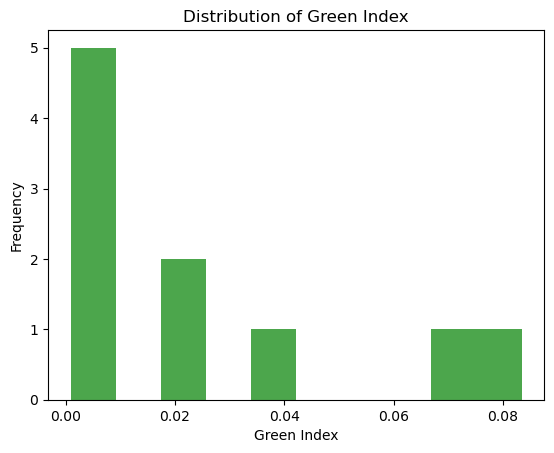

In [5]:
plt.hist(green_index_values, bins=10, color='green', alpha=0.7)
plt.xlabel('Green Index')
plt.ylabel('Frequency')
plt.title('Distribution of Green Index')
plt.show()